# **Q2. Business Case: Aerofit - Descriptive Statistics & Probability**

## **Problem Statement:**
### Identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
sns.set_theme(style="darkgrid")

In [2]:
df = pd.read_csv("aerofit_treadmill.csv")

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


***
***
## **1. Analyzing Basic Metrics.**

In [4]:
df.shape

(180, 9)

In [5]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

***
***
## **2. Non-Graphical Analysis: Value Counts and Unique Attributes.**

In [6]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [7]:
df['Age'].value_counts().head(10)

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
Name: Age, dtype: int64

In [8]:
df['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [9]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [10]:
df['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [11]:
df['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

***
***
## **3. Missing Value & Outlier Detection.**

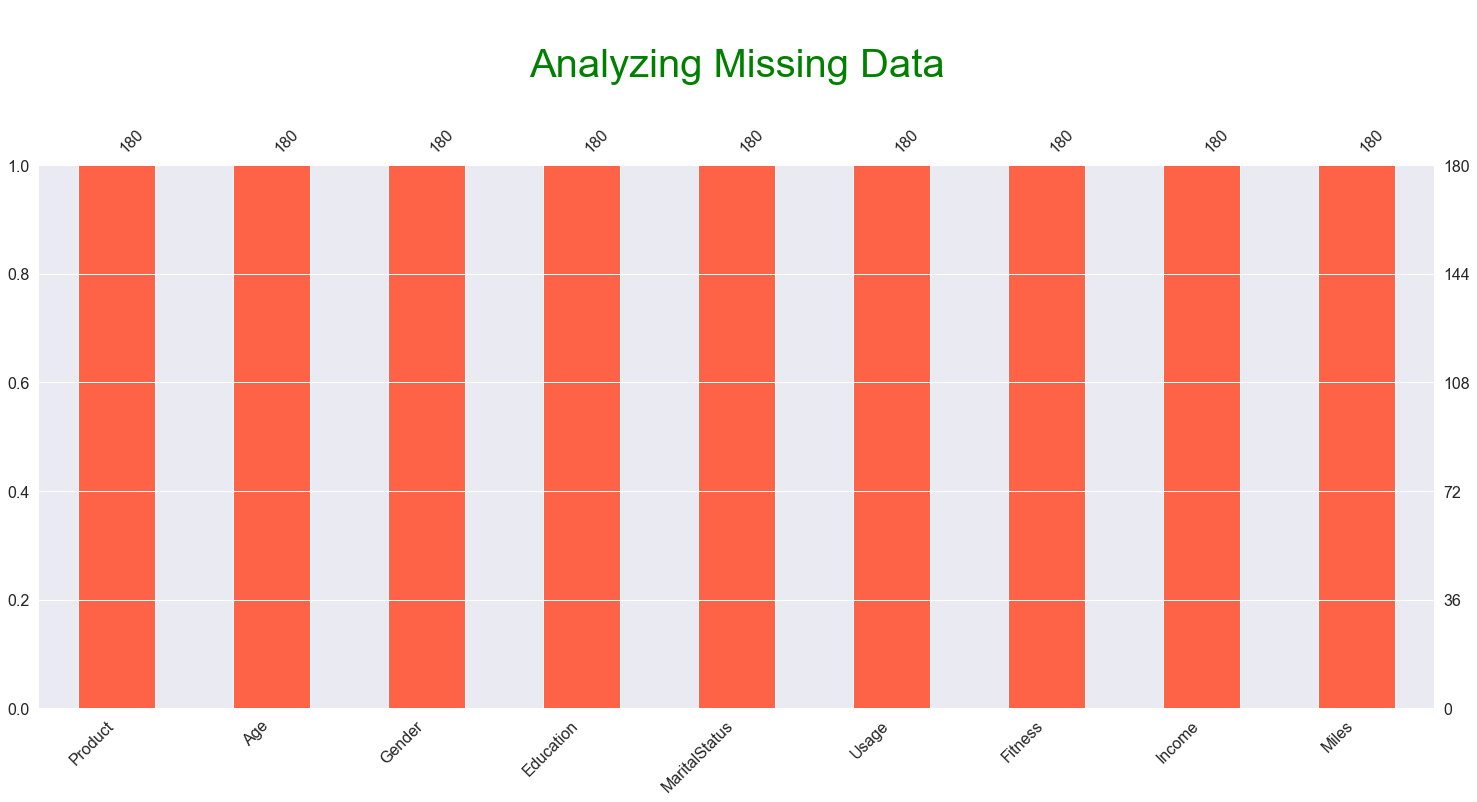

In [12]:
msno.bar(df, color='tomato')
plt.title("\nAnalyzing Missing Data\n", fontsize=40, color="green")
plt.show()

In [13]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


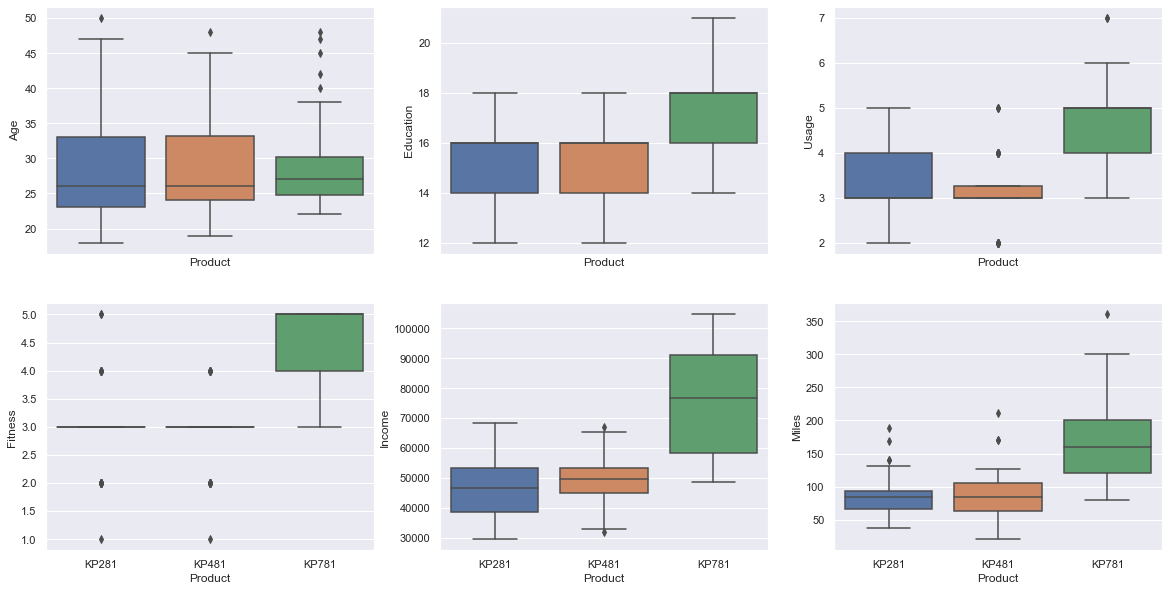

In [14]:
fig, axes = plt.subplots(2, 3, sharex=True, figsize=(20,10))
for col, x, y in [['Age', 0, 0], ['Education', 0, 1], ['Usage', 0, 2], ['Fitness', 1, 0], ['Income', 1, 1], ['Miles', 1, 2]]:
    sns.boxplot(data=df, y=col, ax=axes[x, y], x='Product')
plt.show()

***
***
## **4. Visual Analysis - Univariate & Bivariate.**

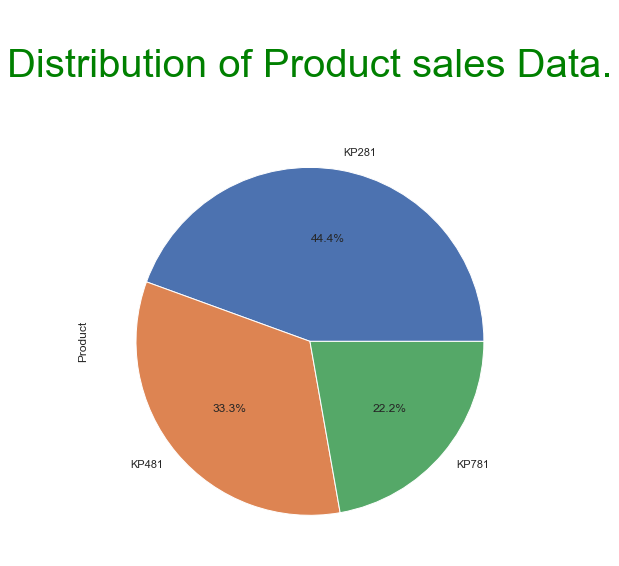

In [15]:
plt.figure(figsize=(14,7))
df['Product'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(8,8))
plt.title("\nDistribution of Product sales Data.\n", fontsize=40, color="green")
plt.show()

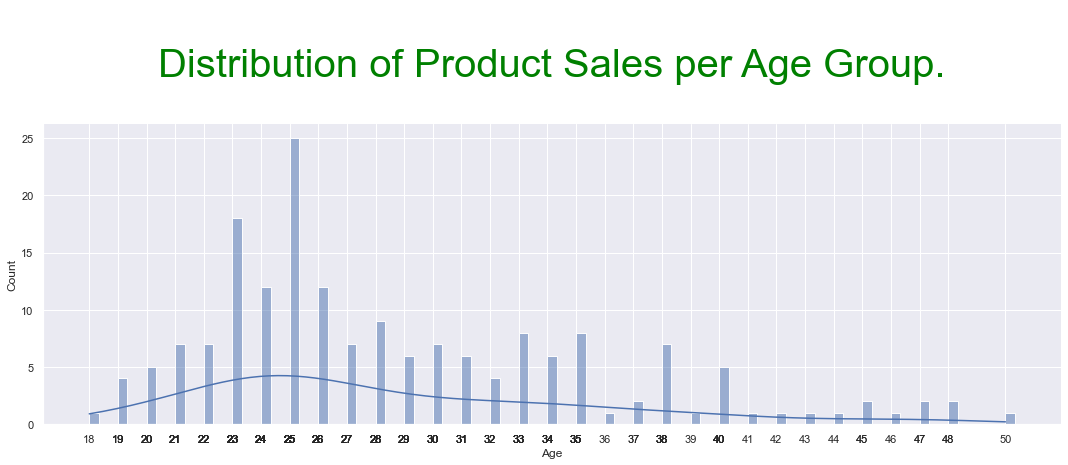

In [16]:
ax = sns.displot(data=df, x='Age', aspect=3, kde=True, binwidth=1/3, palette="Set1")
ax.set(xticks=df['Age'])
plt.title("\nDistribution of Product Sales per Age Group.\n", fontsize=40, color="green")
plt.show()

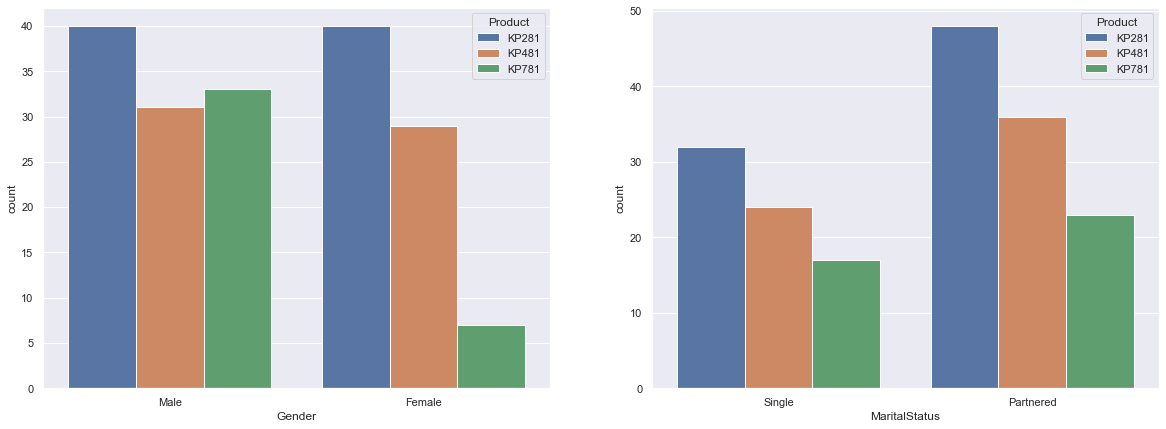

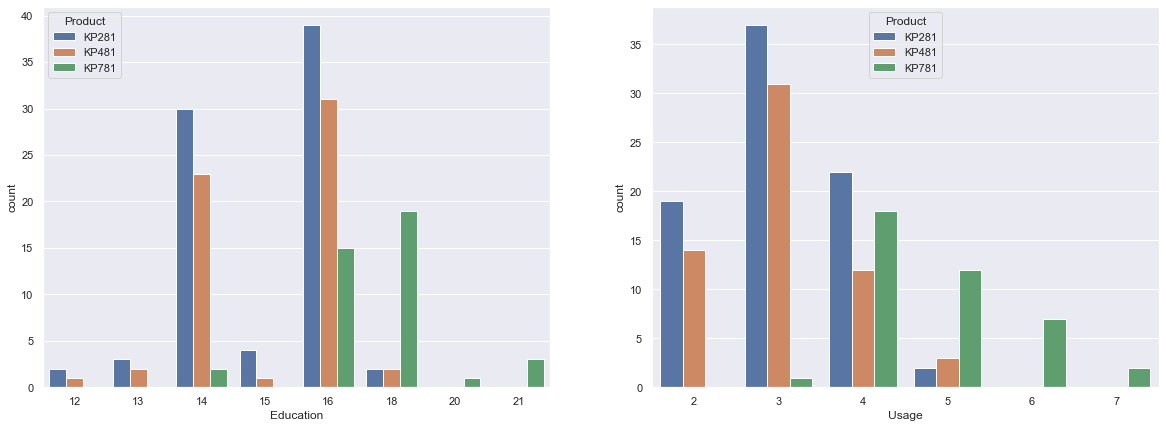

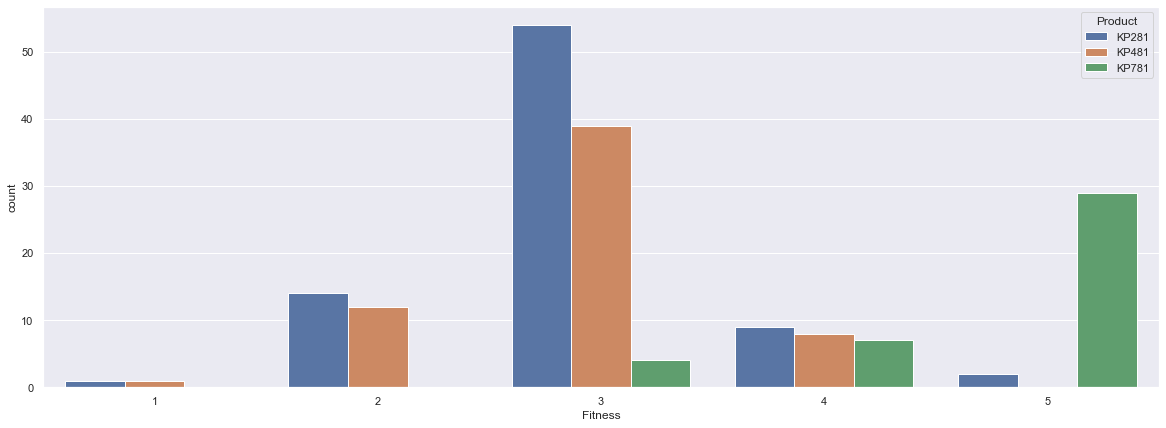

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(20,7))
for col, x in [['Gender', 0], ['MaritalStatus', 1]]:
    sns.countplot(data=df, x=col, hue='Product', ax=axes[x])
plt.show()
fig, axes = plt.subplots(1, 2, figsize=(20,7))
for col, x in [['Education', 0], ['Usage', 1]]:
    sns.countplot(data=df, x=col, hue='Product', ax=axes[x])
plt.show()
fig, axes = plt.subplots(1, 1, figsize=(20,7))
sns.countplot(data=df, x='Fitness', hue='Product', ax=axes)
plt.show()

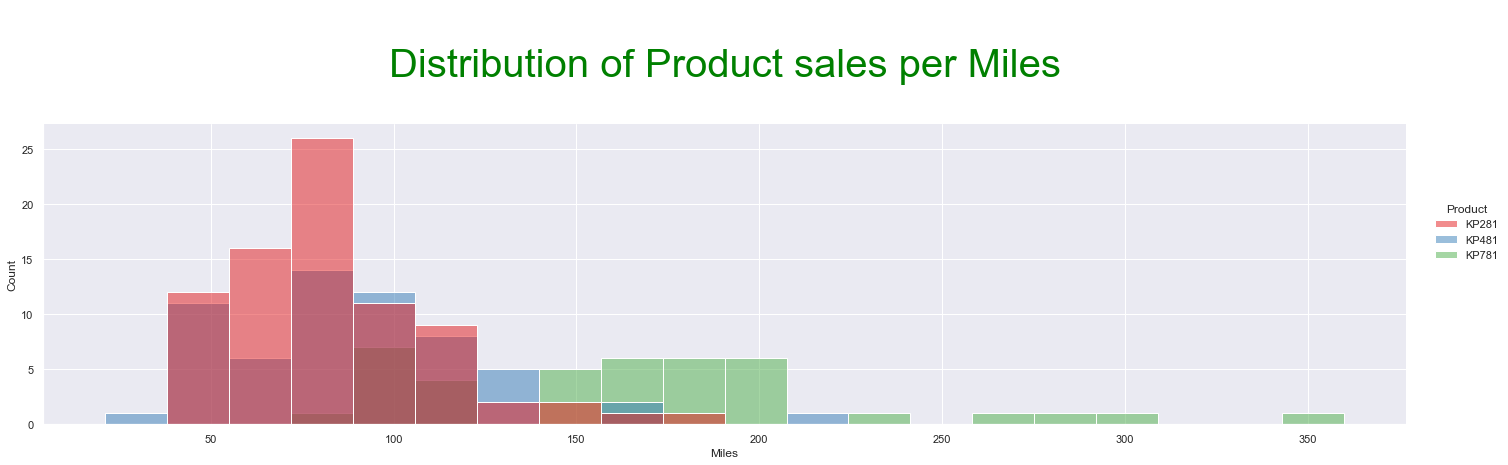

In [18]:
sns.displot(data=df, x='Miles', aspect=4, hue='Product', palette="Set1")
plt.title("\nDistribution of Product sales per Miles\n", fontsize=40, color="green")
plt.show()

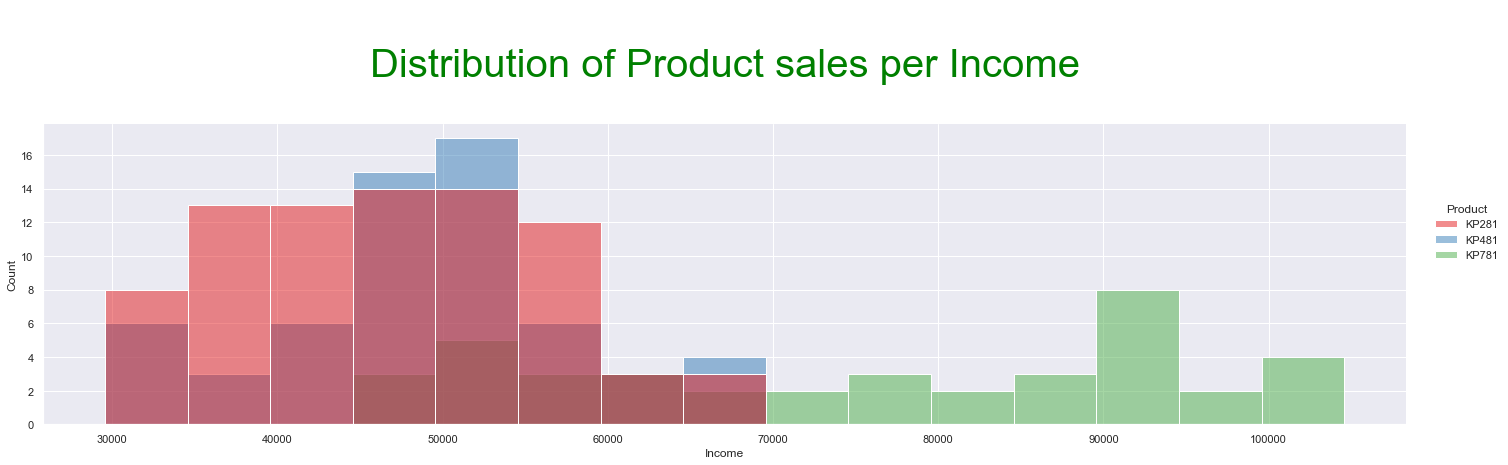

In [19]:
sns.displot(data=df, x='Income', aspect=4, hue='Product', palette="Set1")
plt.title("\nDistribution of Product sales per Income\n", fontsize=40, color="green")
plt.show()

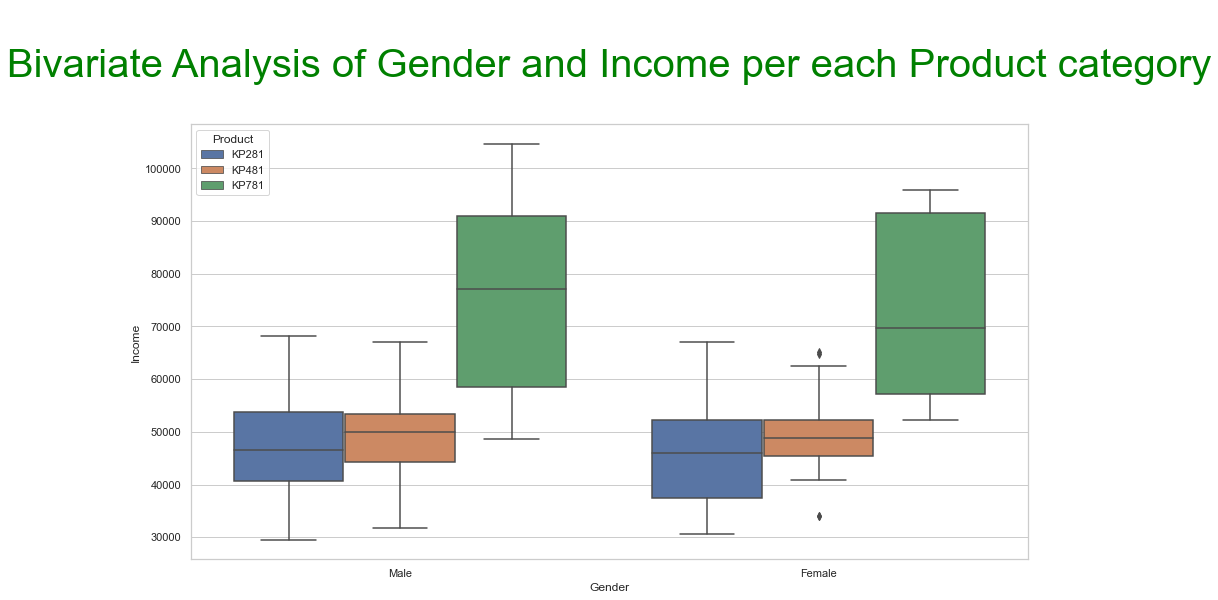

In [20]:
plt.figure(figsize = (15,8))
sns.set_style("whitegrid")
sns.boxplot(x = 'Gender', y = 'Income', data = df, hue= 'Product')
plt.title("\nBivariate Analysis of Gender and Income per each Product category\n", fontsize=40, color="green")
plt.show()

***
***
## **5. Convert data to Numerical Categories.**

In [21]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if str(x)=='Male' else 0)
df['MaritalStatus'] = df['MaritalStatus'].apply(lambda x: 1 if str(x)=='Partnered' else 0)
df['AgeCategory'] = df['Age'].apply(lambda x: int((int(x)-18)/4))
df['MilesCategory'] = df['Miles'].apply(lambda x: int(float(x)/50))
df['IncomeCategory'] = df['Income'].apply(lambda x: int((int(x)-30000)/5000))
df.drop(['Age', 'Miles', 'Income'], axis=1, inplace=True)
df.head()

,Product,Gender,Education,MaritalStatus,Usage,Fitness,AgeCategory,MilesCategory,IncomeCategory
0,KP281,1,14,0,3,4,0,2,0
1,KP281,1,15,0,2,3,0,1,0
2,KP281,0,14,1,4,3,0,1,0
3,KP281,1,12,0,3,3,0,1,0
4,KP281,1,13,1,4,2,0,0,1


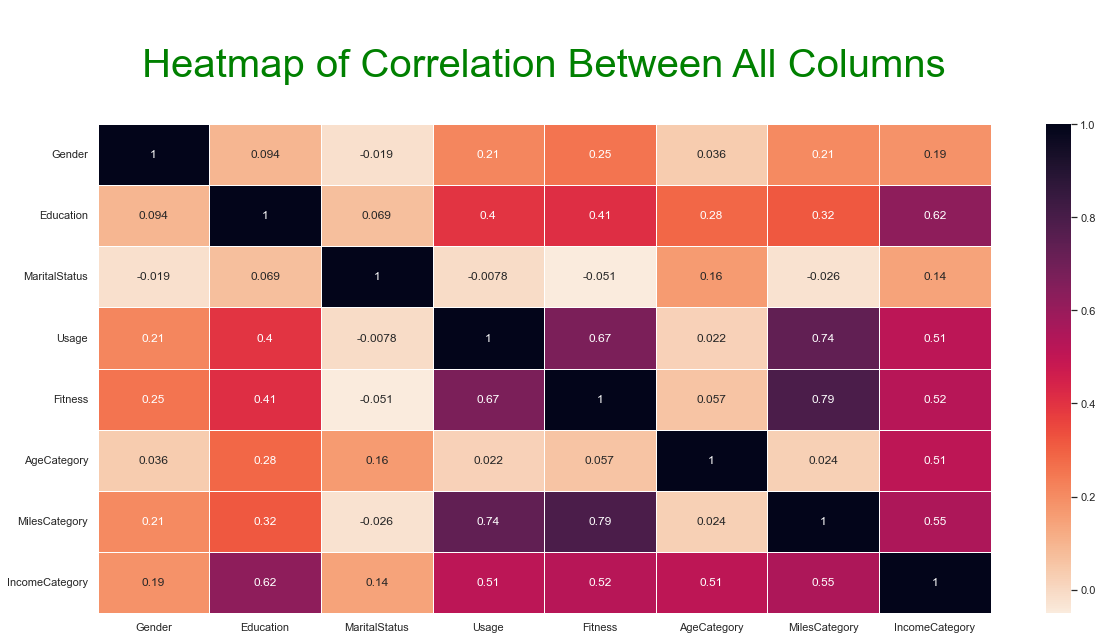

In [22]:
fig, ax = plt.subplots(figsize=(20,9))
sns.heatmap(df.corr(), linewidths=.5, cmap=sns.cm.rocket_r, annot=True, ax=ax)
plt.title("\nHeatmap of Correlation Between All Columns\n", fontsize=40, color="green")
plt.show()

***
***
## **6. Conditional Probabilities of All Columns per each Product Category.**

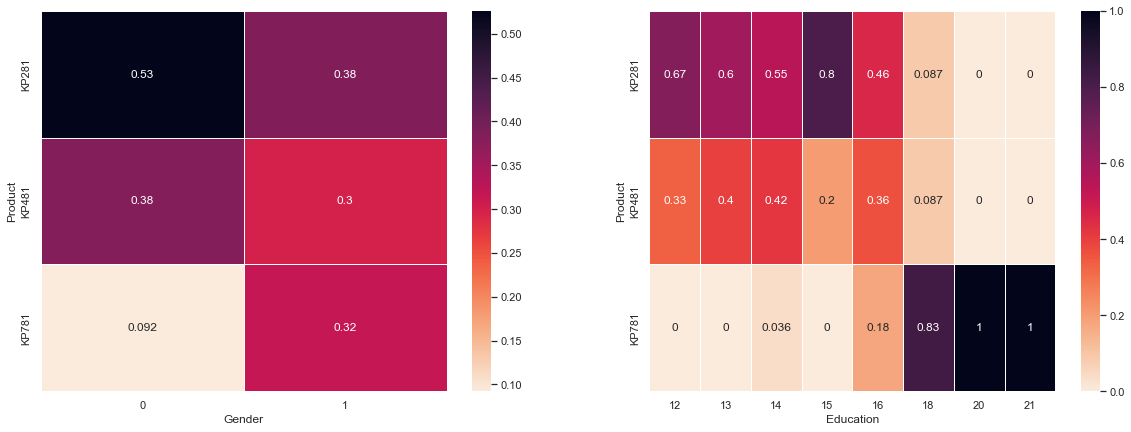

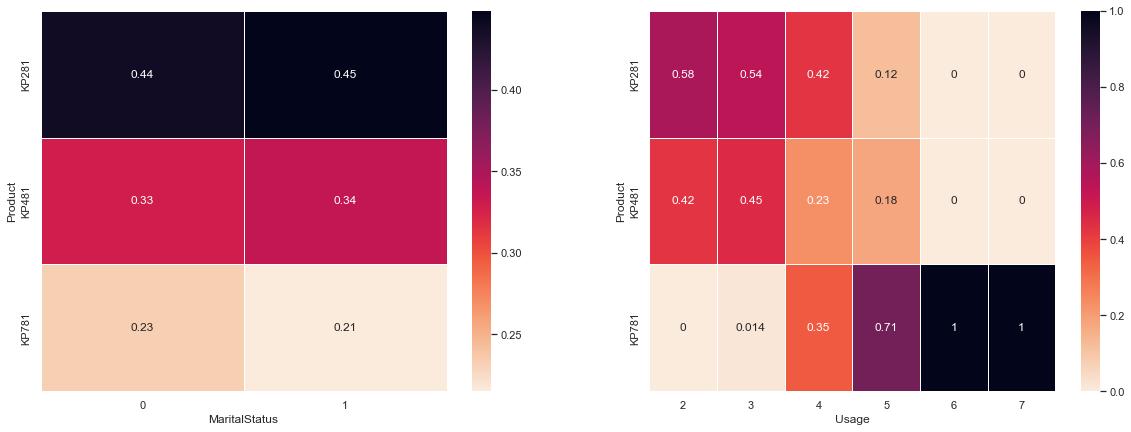

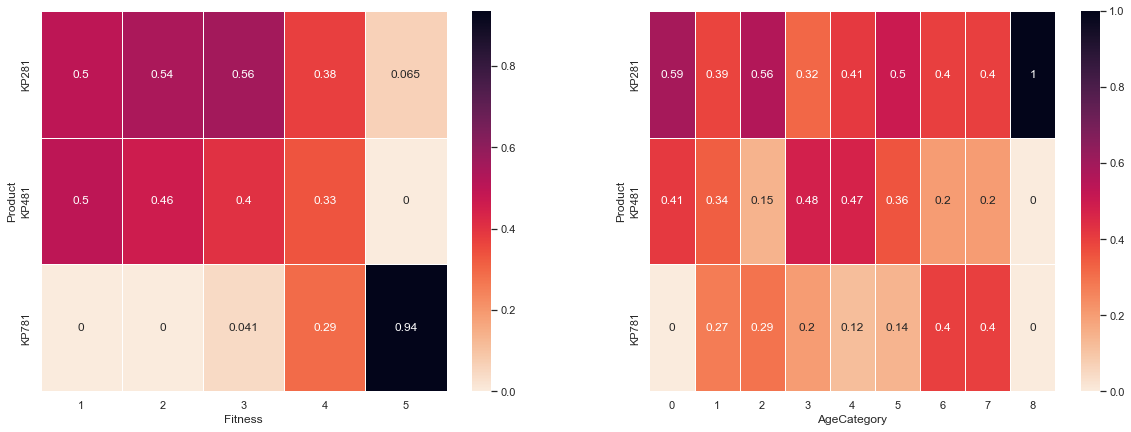

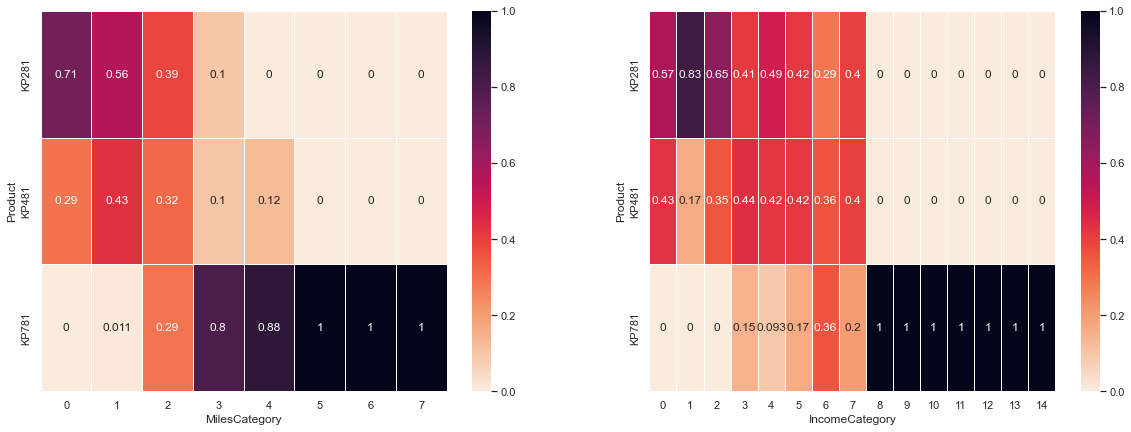

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(20,7))
for i in range(1, len(df.columns)):
    y = (i-1)%2
    sns.heatmap(pd.crosstab(df.Product, df[df.columns[i]], normalize='columns'), linewidths=.5, cmap=sns.cm.rocket_r, annot=True, ax=ax[y])
    if y == 1:
        plt.show()
        if i < len(df.columns)-1:
            fig, ax = plt.subplots(1, 2, figsize=(20,7))


***
***
## **7. Business Insights.**
#### **A.** People with higher income prefer to buy KP781 over the other products.
#### **B.** People with lower and middle income prefer to buy KP281 and KP481 over the other products.
#### **C.** People with higher fitness levels prefer to buy KP781 over the other products.
#### **D.** People with lower and middle fitness levels prefer to buy KP281 and KP481 over the other products.
#### **E.** People who expect extensive use of the product prefer to buy KP781 over the other products.
#### **F.** People who expect less extensive use of the product prefer to buy KP281 and KP481 over the other products.
#### **G.** Marital Status seems to have no apparent effect over individual preferences to buy different products.
#### **H.** Males prefer to buy KP781 significantly more than Women. 
#### **I.** Female prefer to buy KP281 and KP481 significantly more than Men.
#### **J.** People with higher education prefer to buy KP781 over the other products.
#### **K.** People with lower and middle education prefer to buy KP281 and KP481 over the other products.
#### **L.** Individuals with Age between 20-30 are more likely to buy any of the products than other Age groups.

***
***
## **8. Recommendations**
#### **A.** Aerofit should target selling KP781 product to the men with higher fitness levels, higher income and higher education.
#### **B.** Aerofit should target selling KP281 and KP481 products to the individuals with average or below average fitness levels, income and education.
#### **C.** Aerofit should target selling KP781 product to the people who are expecting more extensive usage of the product.
#### **D.** Aerofit should target selling KP281, KP481 products to the people who are expecting less extensive usage of the product.
#### **E.** Aerofit should target selling products to the people who are aged between 20-30 years, more than other age groups. Targeted advertisements should be used for the same.